#**Capstone Project: London Transport Policy Analysis**
##**Exploratory Data Analysis**
###Andrea Broaddus

##**1. Data Cleaning**

First we load the data and look at the feature types and sample data.

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
data = pd.read_csv('/content/drive/MyDrive/MLAI_Haas/data/London_CC_LSOA.csv')

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4765 entries, 0 to 4764
Data columns (total 83 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lsoa01                4765 non-null   object 
 1   lsoa01_name           4765 non-null   object 
 2   lsoa_area             4765 non-null   float64
 3   cc                    4765 non-null   int64  
 4   afm_firms_2001        4765 non-null   float64
 5   afm_firms_2011        4765 non-null   float64
 6   afm_pct_chg           4765 non-null   float64
 7   bizsup_firms_2001     4765 non-null   float64
 8   bizsup_firms_2011     4765 non-null   float64
 9   bizsup_pct_chg        4765 non-null   float64
 10  car_time_2001         4765 non-null   int64  
 11  car_time_2011         4765 non-null   float64
 12  car_time_pct_chg      4765 non-null   float64
 13  comtelrd_firms_2001   4765 non-null   float64
 14  comtelrd_firms_2011   4765 non-null   float64
 15  comtelrd_pct_chg     

In [94]:
data.sample(5)

,lsoa01,lsoa01_name,lsoa_area,cc,afm_firms_2001,afm_firms_2011,afm_pct_chg,bizsup_firms_2001,bizsup_firms_2011,bizsup_pct_chg,...,retail_pct_chg,small_firms_2001,small_firms_2011,small_pct_chg,tsp_firms_2001,tsp_firms_2011,tsp_pct_chg,ws_firms_2001,ws_firms_2011,ws_pct_chg
4384,E01003794,Redbridge 018B,21.78,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3364,E01001179,Croydon 016D,134.56,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,E01000493,Brent 030D,18.69,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1213,E01003645,Redbridge 017D,16.49,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.55,12.00,12.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3789,E01003335,Lewisham 035E,7.15,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##2.1 Check for duplicates and outliers



In [95]:
#Check for duplicates
data.duplicated().sum()

0

In [96]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe()

,lsoa_area,cc,afm_firms_2001,afm_firms_2011,afm_pct_chg,bizsup_firms_2001,bizsup_firms_2011,bizsup_pct_chg,car_time_2001,car_time_2011,...,retail_pct_chg,small_firms_2001,small_firms_2011,small_pct_chg,tsp_firms_2001,tsp_firms_2011,tsp_pct_chg,ws_firms_2001,ws_firms_2011,ws_pct_chg
count,4765.00,4765.00,598.00,352.00,308.00,607.00,742.00,440.00,4765.00,4765.00,...,1767.00,1508.00,1600.00,821.00,507.00,408.00,315.00,557.00,419.00,348.00
mean,33.02,0.02,23.40,22.35,-0.21,27.59,28.31,0.33,5.00,5.28,...,-0.02,21.47,23.14,0.13,20.09,20.47,-0.03,25.13,24.28,-0.08
std,63.36,0.14,30.52,28.90,0.37,78.83,77.04,1.91,0.00,4.68,...,0.29,74.19,87.62,0.39,24.58,25.83,0.34,40.93,34.45,0.35
min,1.79,0.00,8.00,8.00,-0.73,8.00,8.00,-0.80,5.00,5.00,...,-0.65,0.00,0.00,-0.72,8.00,8.00,-0.81,8.00,8.00,-0.72
25%,13.65,0.00,12.00,11.75,-0.41,12.00,11.00,-0.17,5.00,5.00,...,-0.20,0.00,0.00,-0.12,11.00,11.75,-0.25,12.00,11.00,-0.33
50%,20.61,0.00,15.00,15.00,-0.27,15.00,15.00,0.07,5.00,5.00,...,-0.07,12.00,12.00,0.07,14.00,14.00,-0.08,15.00,15.00,-0.16
75%,32.37,0.00,24.00,20.00,-0.09,21.50,22.00,0.42,5.00,5.00,...,0.11,21.00,21.00,0.30,20.00,20.00,0.13,23.00,23.50,0.10
max,1579.66,1.00,401.00,285.00,4.27,1576.00,1582.00,37.47,5.00,120.00,...,2.74,2220.00,2703.00,2.97,280.00,288.00,1.30,487.00,417.00,1.50


In [97]:
#Drop non numeric features and features that will not be used as predictors
X=data.drop(columns=['lsoa01', 'lsoa01_name', 'lsoa_area', 'car_time_2001'])
X.shape

(4765, 69)

In [98]:
#Method of identifying outliers from https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset
from collections import Counter

def IQR_method (data,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(data[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(data[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = data[(data[column] < Q1 - outlier_step) | (data[column] > Q3 + outlier_step )].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    out1 = data[data[column] < Q1 - outlier_step]
    out2 = data[data[column] > Q3 + outlier_step]

    print('Total number of records below lower bound value: ', out1.shape[0])
    print('Total number of records above upper bound value: ', out2.shape[0])

    #Save the cleaned dataset
    out1.to_csv('/content/drive/MyDrive/MLAI_Haas/Capstone/outliers_below.csv', index=False)
    out2.to_csv('/content/drive/MyDrive/MLAI_Haas/Capstone/outliers_above.csv', index=False)

    # Create a new column 'outlier' in data, initialized to 0
    data['out_below'] = 0
    data['out_above'] = 0
    # Set 'outlier' to 1 for rows identified as outliers
    data.loc[out1.index, 'out_below'] = 1
    data.loc[out2.index, 'out_above'] = 1

    print('Total number of detected outliers is:', out1.shape[0]+out2.shape[0])
    print('Percentage of dataset that is outliers is:', (out1.shape[0]+out2.shape[0])/len(X))

    return multiple_outliers

In [99]:
# detecting outliers
numeric_columns=X.columns
Outliers_IQR = IQR_method(data,1,numeric_columns)

Total number of records below lower bound value:  0
Total number of records above upper bound value:  0
Total number of detected outliers is: 0
Percentage of dataset that is outliers is: 0.0


In [100]:
cross_tab = pd.crosstab(data['out_below'], data['cc'])
print(cross_tab)

cc            0   1
out_below          
0          4672  93


In [101]:
cross_tab = pd.crosstab(data['out_above'], data['cc'])
print(cross_tab)

cc            0   1
out_above          
0          4672  93


##2.2 Summary of Data Cleaning

*   All the features are numerical  
*   No duplicates were found
*   Many features have highly skewed distributions, therefore all data was normalized to be on the same scale
*   328 cases (6.8%) were found to have outliers in multiple features, 44 of which were in the congestion charge zone, but since they were accurate data they were left in the dataset
*   Many features have a significant percentage of null values, such as counts of large firms with over 500 employees which are only present in a few LSOAs. Since the null values represented counts of zero in other areas, nulls were replaced with zeroes in the dataset.


##**3. Data Exploration and Feature Engineering**






##3.1 Feature Distributions

Now we will use the cleaned and prepared dataset to look at the descriptive statistics, with visualizations, and make some observations.

Comparison of feature changes inside and outside zone

In [102]:
#Check the percentage of target features, it is highly imbalanced
in_cc=data['cc']==1
print("Number of LSOAs inside the Congestion Zone:", in_cc.value_counts())
print("Percentage of LSOAs inside the Congestion Zone:", in_cc.value_counts(1),"%)")

Number of LSOAs inside the Congestion Zone: cc
False    4672
True       93
Name: count, dtype: int64
Percentage of LSOAs inside the Congestion Zone: cc
False   0.98
True    0.02
Name: proportion, dtype: float64 %)


In [103]:
# Replace zeros with NaN for all columns except 'cc'
for column in data.columns:
    if column != 'cc':
        data[column] = data[column].replace(0, np.nan)

Text(0, 0.5, 'Count of LSOAs')

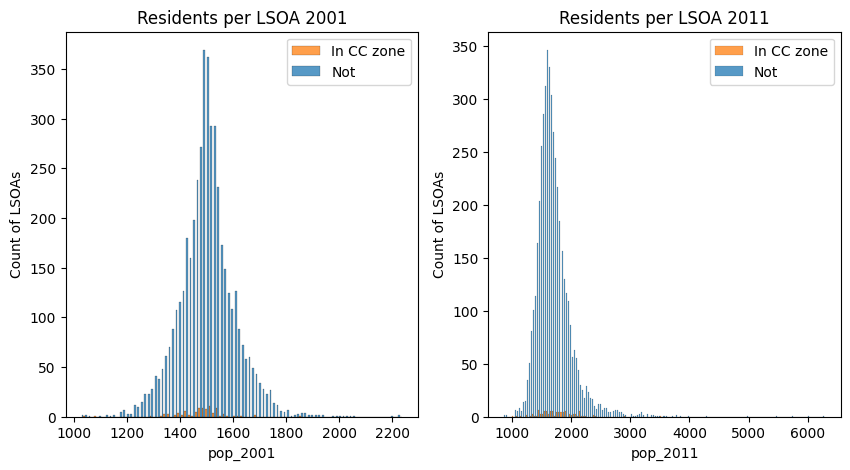

In [104]:
#Distribution of population
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="pop_2001", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Residents per LSOA 2001')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="pop_2011", hue='cc', multiple="dodge", legend=False, ax=axs[1])
axs[1].legend(labels=['In CC zone', 'Not'])
axs[1].set_title('Residents per LSOA 2011')
axs[1].set_ylabel('Count of LSOAs')

Text(0, 0.5, 'Count of LSOAs')

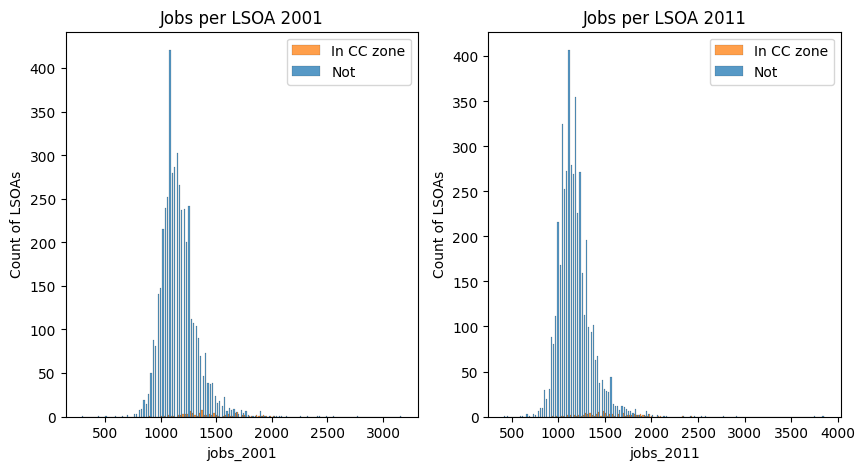

In [105]:
#Distribution of employment
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="jobs_2001", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Jobs per LSOA 2001')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="jobs_2011", hue='cc', multiple="dodge", legend=False, ax=axs[1])
axs[1].legend(labels=['In CC zone', 'Not'])
axs[1].set_title('Jobs per LSOA 2011')
axs[1].set_ylabel('Count of LSOAs')

Text(0.5, 1.0, 'Car travel time per LSOA 2011')

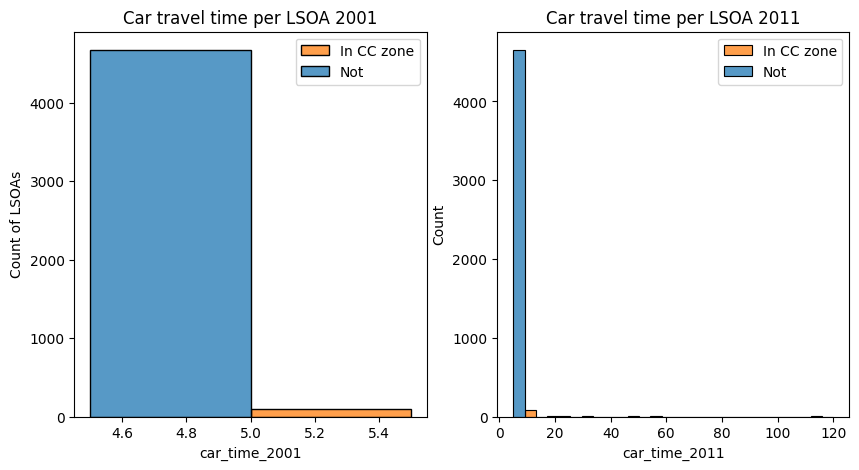

In [106]:
#Distribution of car travel times
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="car_time_2001", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Car travel time per LSOA 2001')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="car_time_2011", hue='cc', multiple="dodge", legend=False, ax=axs[1])
plt.legend(labels=['In CC zone', 'Not'])
plt.title('Car travel time per LSOA 2011')

Text(0.5, 1.0, 'Public transit travel time per LSOA 2011')

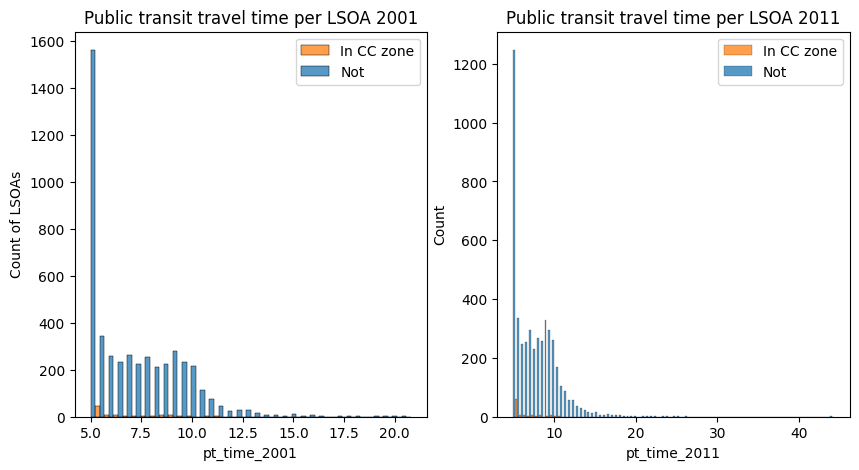

In [107]:
#Distribution of public transit travel times
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="pt_time_2001", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Public transit travel time per LSOA 2001')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="pt_time_2011", hue='cc', multiple="dodge", legend=False, ax=axs[1])
plt.legend(labels=['In CC zone', 'Not'])
plt.title('Public transit travel time per LSOA 2011')




Text(0.5, 1.0, 'Average office rent LSOA 2011')

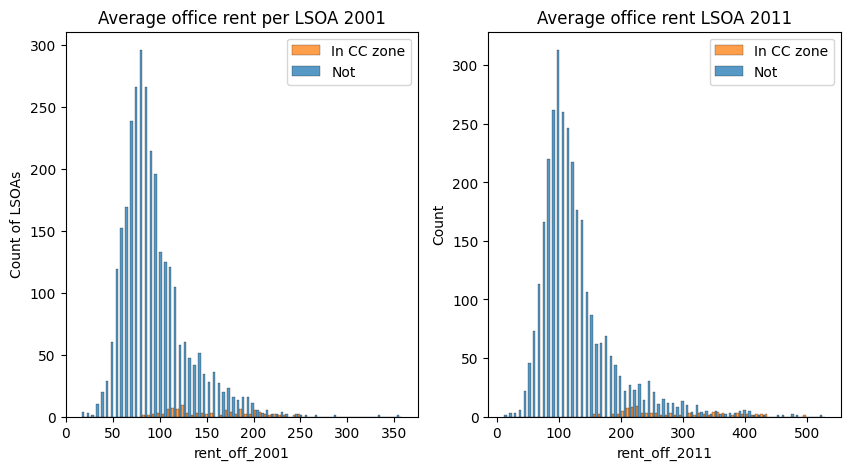

In [108]:
#Distribution of office rent values
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="rent_off_2001", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Average office rent per LSOA 2001')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="rent_off_2011", hue='cc', multiple="dodge", legend=False, ax=axs[1])
plt.legend(labels=['In CC zone', 'Not'])
plt.title('Average office rent LSOA 2011')


Text(0.5, 1.0, 'Average retail rent LSOA 2011')

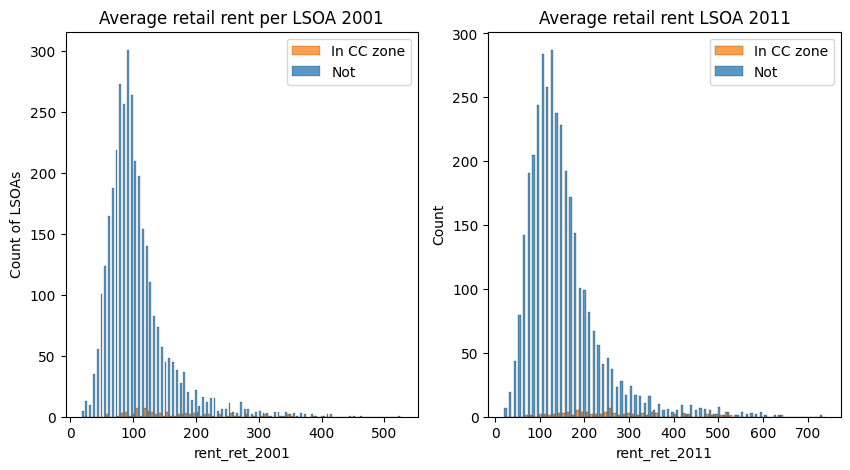

In [109]:
#Distribution of retail rent values
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="rent_ret_2001", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Average retail rent per LSOA 2001')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="rent_ret_2011", hue='cc', multiple="dodge", legend=False, ax=axs[1])
plt.legend(labels=['In CC zone', 'Not'])
plt.title('Average retail rent LSOA 2011')

Text(0.5, 1.0, 'Average warehouse rent LSOA 2011')

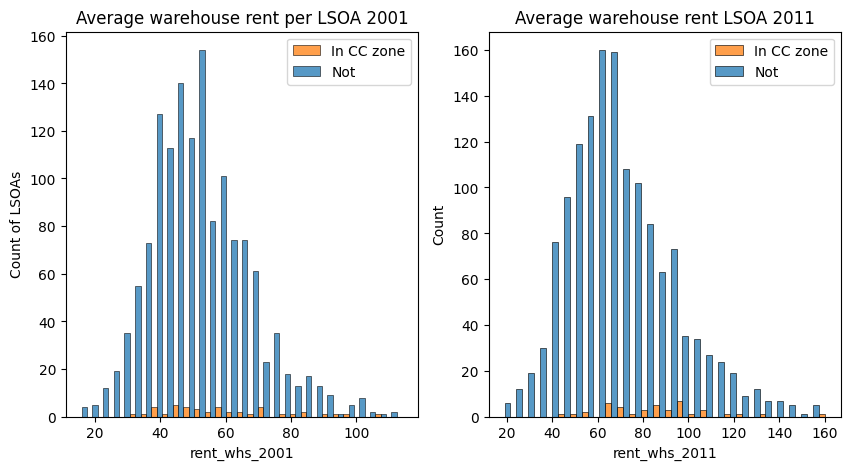

In [110]:
#Distribution of office rent values
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="rent_whs_2001", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Average warehouse rent per LSOA 2001')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="rent_whs_2011", hue='cc', multiple="dodge", legend=False, ax=axs[1])
plt.legend(labels=['In CC zone', 'Not'])
plt.title('Average warehouse rent LSOA 2011')

Text(0.5, 1.0, 'Large firms per LSOA 2011')

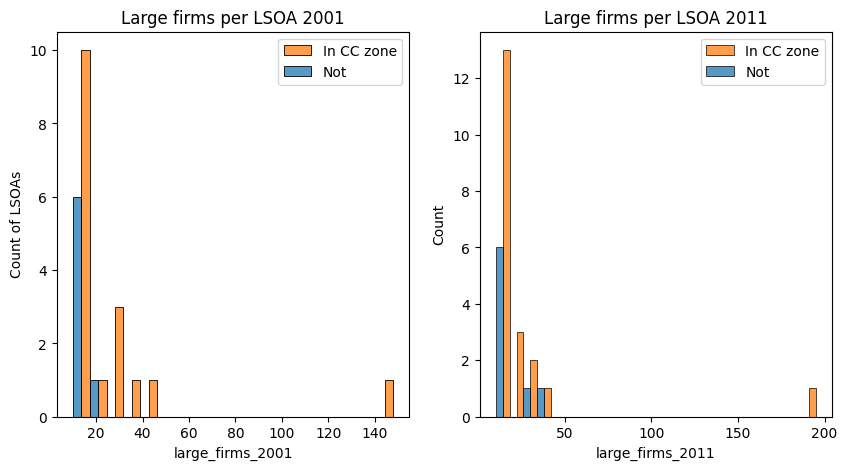

In [111]:
#Distribution of large firms
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="large_firms_2001", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Large firms per LSOA 2001')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="large_firms_2011", hue='cc', multiple="dodge", legend=False, ax=axs[1])
plt.legend(labels=['In CC zone', 'Not'])
plt.title('Large firms per LSOA 2011')

In [112]:
data['lrg_firms_2001_log'] = np.log1p(data['large_firms_2001'])
data['lrg_firms_2011_log'] = np.log1p(data['large_firms_2011'])

Text(0.5, 1.0, 'Large firms per LSOA 2011 Log')

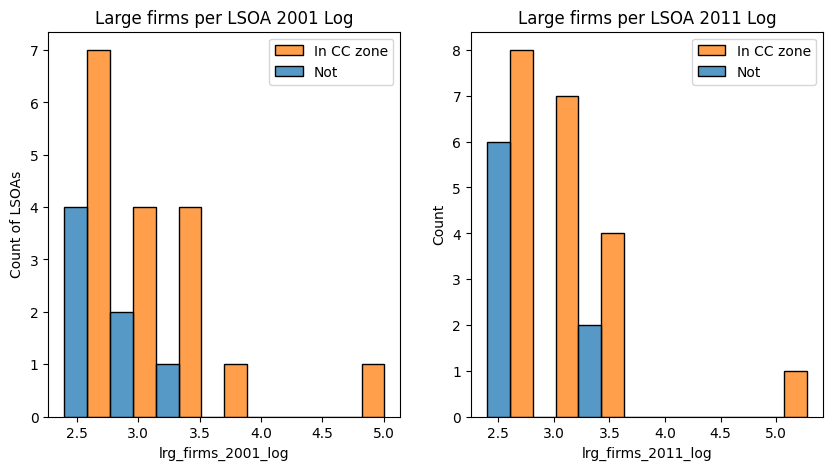

In [113]:
#Distribution log of large firms
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="lrg_firms_2001_log", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Large firms per LSOA 2001 Log')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="lrg_firms_2011_log", hue='cc', multiple="dodge", legend=False, ax=axs[1])
plt.legend(labels=['In CC zone', 'Not'])
plt.title('Large firms per LSOA 2011 Log')

Text(0.5, 1.0, 'Medium firms per LSOA 2011')

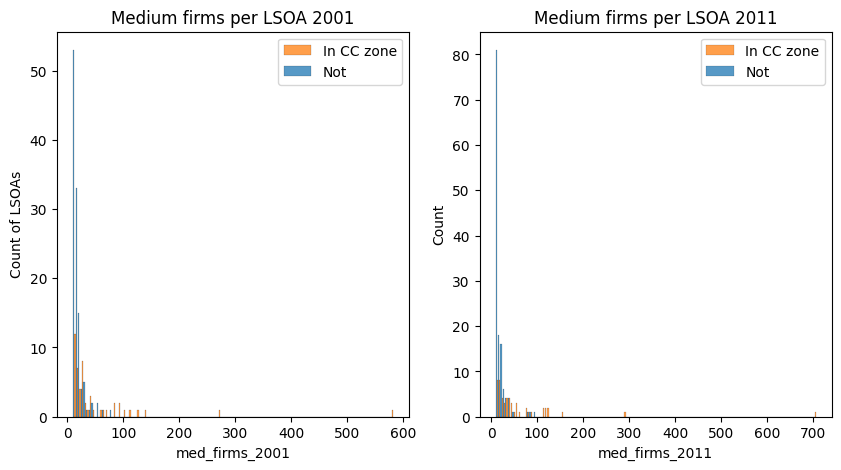

In [114]:
#Distribution of medium firms
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="med_firms_2001", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Medium firms per LSOA 2001')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="med_firms_2011", hue='cc', multiple="dodge", legend=False, ax=axs[1])
plt.legend(labels=['In CC zone', 'Not'])
plt.title('Medium firms per LSOA 2011')

In [115]:
data['med_firms_2001_log'] = np.log1p(data['med_firms_2001'])
data['med_firms_2011_log'] = np.log1p(data['med_firms_2011'])

Text(0.5, 1.0, 'Medium firms per LSOA 2011 Log')

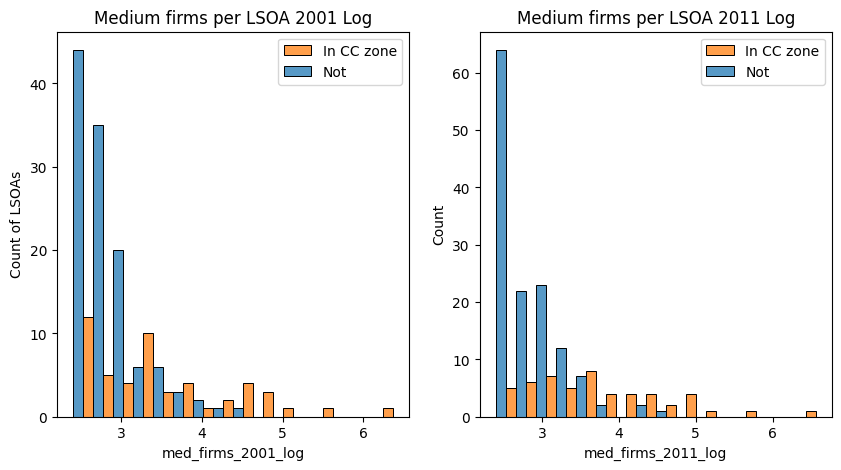

In [116]:
#Distribution log of medium firms
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="med_firms_2001_log", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Medium firms per LSOA 2001 Log')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="med_firms_2011_log", hue='cc', multiple="dodge", legend=False, ax=axs[1])
plt.legend(labels=['In CC zone', 'Not'])
plt.title('Medium firms per LSOA 2011 Log')

Text(0.5, 1.0, 'Small firms per LSOA 2011')

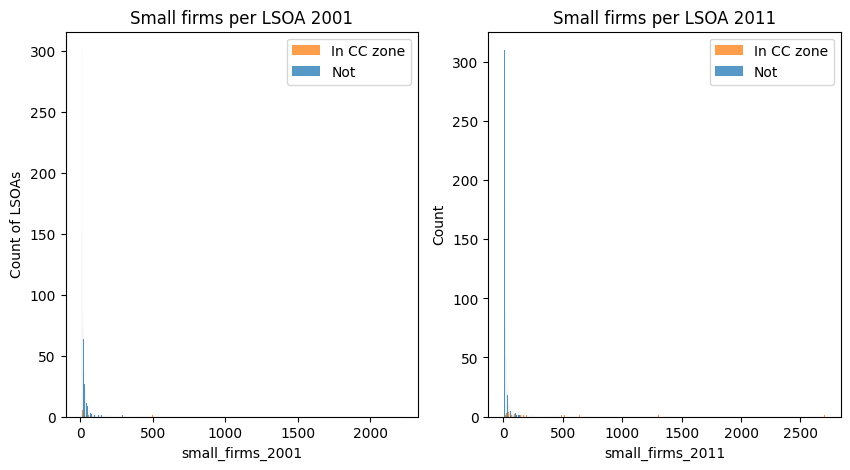

In [117]:
#Distribution of small firms
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="small_firms_2001", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Small firms per LSOA 2001')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="small_firms_2011", hue='cc', multiple="dodge", legend=False, ax=axs[1])
plt.legend(labels=['In CC zone', 'Not'])
plt.title('Small firms per LSOA 2011')

In [118]:
data['sm_firms_2001_log'] = np.log1p(data['small_firms_2001'])
data['sm_firms_2011_log'] = np.log1p(data['small_firms_2011'])

Text(0.5, 1.0, 'Small firms per LSOA 2011 Log')

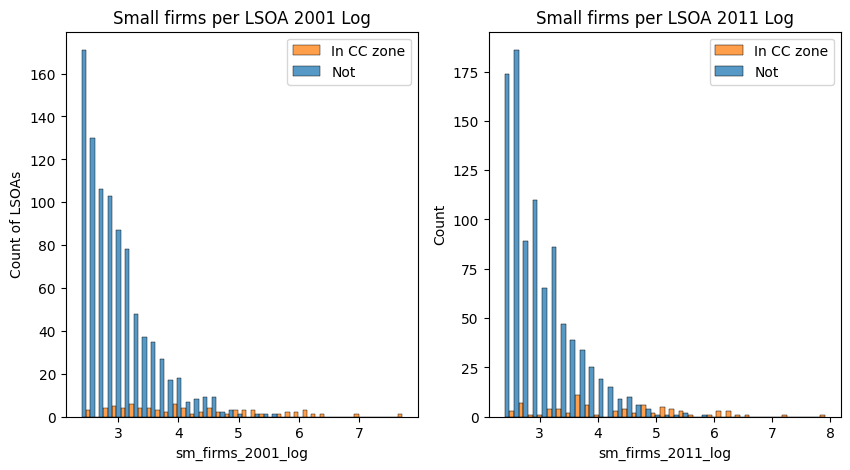

In [119]:
#Distribution log of small firms
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="sm_firms_2001_log", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Small firms per LSOA 2001 Log')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="sm_firms_2011_log", hue='cc', multiple="dodge", legend=False, ax=axs[1])
plt.legend(labels=['In CC zone', 'Not'])
plt.title('Small firms per LSOA 2011 Log')

Text(0.5, 1.0, 'Micro firms per LSOA 2011')

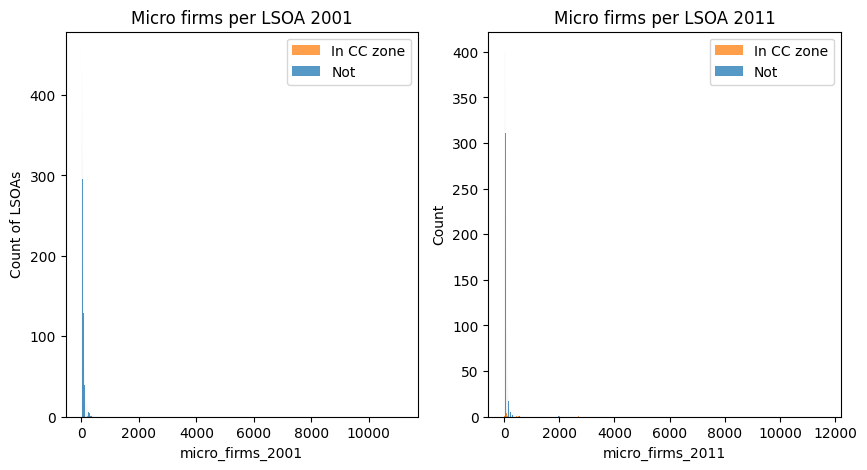

In [120]:
#Distribution of micro firms
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="micro_firms_2001", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Micro firms per LSOA 2001')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="micro_firms_2011", hue='cc', multiple="dodge", legend=False, ax=axs[1])
plt.legend(labels=['In CC zone', 'Not'])
plt.title('Micro firms per LSOA 2011')

In [121]:
data['micro_firms_2001_log'] = np.log1p(data['micro_firms_2001'])
data['micro_firms_2011_log'] = np.log1p(data['micro_firms_2011'])

Text(0.5, 1.0, 'Micro firms per LSOA 2011 Log')

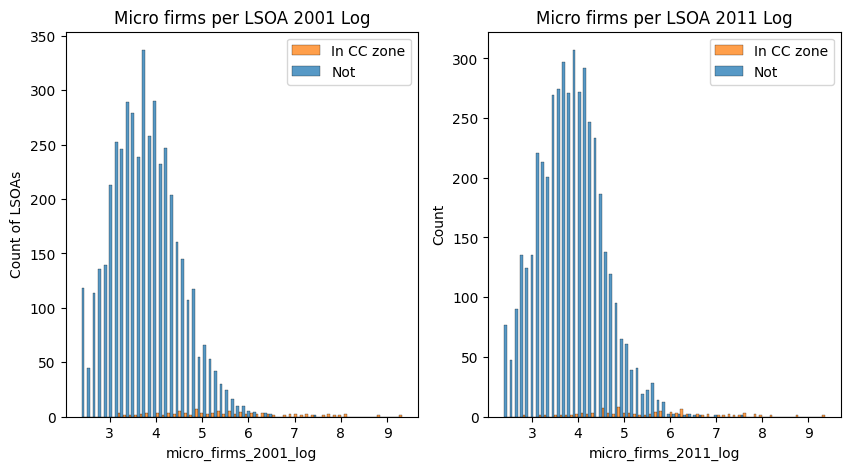

In [122]:
#Distribution log of micro firms
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="micro_firms_2001_log", hue='cc', multiple="dodge", legend=False, ax=axs[0])
axs[0].legend(labels=['In CC zone', 'Not'])
axs[0].set_title('Micro firms per LSOA 2001 Log')
axs[0].set_ylabel('Count of LSOAs')
sns.histplot(data=data, x="micro_firms_2011_log", hue='cc', multiple="dodge", legend=False, ax=axs[1])
plt.legend(labels=['In CC zone', 'Not'])
plt.title('Micro firms per LSOA 2011 Log')

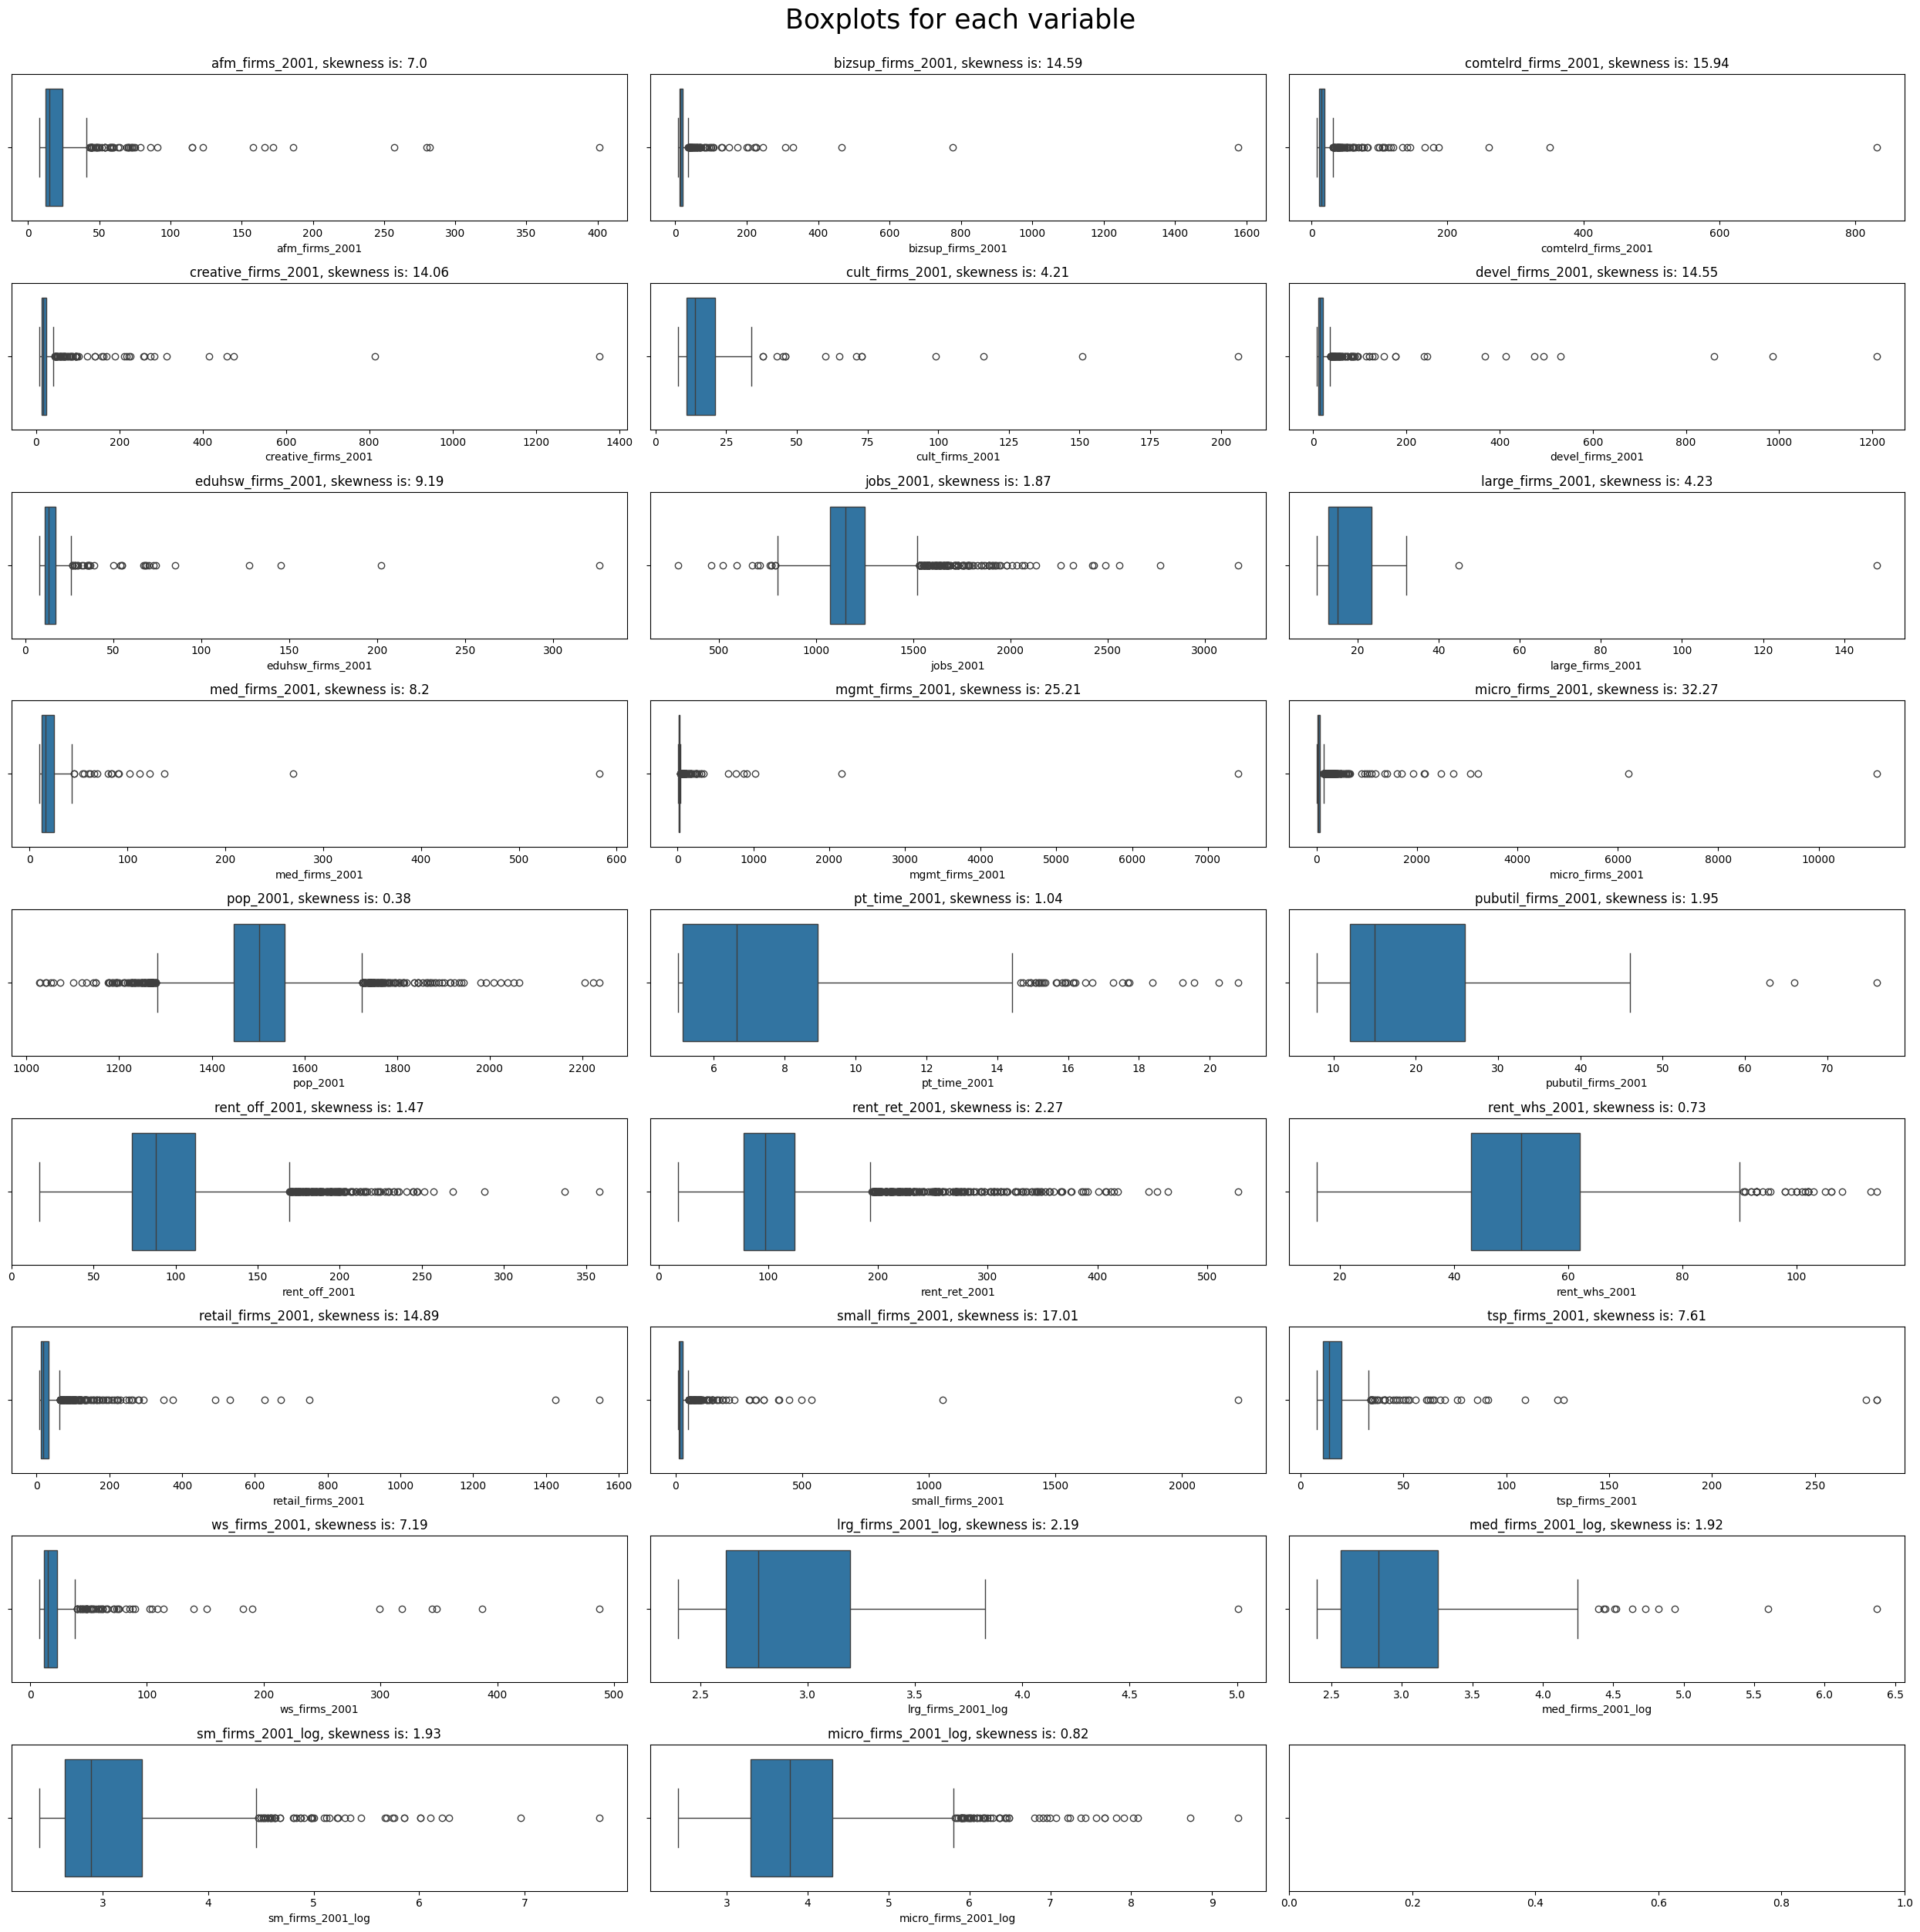

In [123]:
#Boxplots to check skewness, using code from https://www.kaggle.com/code/marcinrutecki/voting-classifier-for-better-results
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(25,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=data, columns_list=X01, rows=9, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [124]:
#Save the cleaned dataset
data.to_csv('/content/drive/MyDrive/MLAI_Haas/data/London_CC_LSOA_cleaned.csv')

## Summary of Observations


*   Some features had highly skewed distributions, we we engineered new log features, for example firm population features
*   The car_time feature for 2001 did not have a distribution at all; all values were 5 minutes access time. This means there was no differentiation between areas of London, in terms of car accessibility. This feature will be dropped, as it cannot provide any predictive power.
*   This also means that the 2011 car_time feature is actually the difference from this uniform baseline in 2001, that is, it represents whether car access time increased or decreased over time.



##3.3 Correlations with congestion charge feature

*   We expect to see the congestion charge zone indicator have a stronger correlation with features that are more prevalent inside the zone, for example, higher office rents, and weaker correlation with features that are less prevalent, like warehouse counts
*   We also expect to see correlation between features that may overlap or be co-located in the same LSOAs, for example, higher office and retail rents, or higher counts of management consulting and business support firms
*   We expect to see strong correlation between the same features in different years, for example, job counts for 2001 and 2011, versus percent change
*   Some features are similar and have potential to be strongly correlated, so the aim is to select those with the most normal distribution and lowest amount of missing data. For example, the counts of firms by size (small, medium, large) versus aggregated together (nonmicro)

In [125]:
#New dataframes containing only LSOAs inside or outside the Congestion Charge zone
data_cc = data[data["cc"] == 1]
data_notcc = data[data["cc"] == 0]
data_cc.shape

(93, 83)

In [126]:
#Descriptive statistics for LSOAs in the congestion zone
data_cc[['pop_2001', 'jobs_2001', 'pt_time_2001', 'car_time_2001', 'large_firms_2001', 'micro_firms_2001' ]].describe()

,pop_2001,jobs_2001,pt_time_2001,car_time_2001,large_firms_2001,micro_firms_2001
count,93.00,93.00,93.00,93.00,17.00,93.00
mean,1470.28,1448.39,6.38,5.00,27.65,652.23
std,103.20,249.66,1.67,0.00,32.37,1427.44
min,1028.00,900.00,5.00,5.00,11.00,22.00
25%,1420.00,1270.00,5.00,5.00,14.00,90.00
50%,1482.00,1390.00,5.61,5.00,17.00,201.00
75%,1514.00,1660.00,7.64,5.00,28.00,502.00
max,1845.00,2010.00,11.01,5.00,148.00,11154.00


In [127]:
#Descriptive statistics for LSOAs not in the congestion zone
data_notcc[['pop_2001', 'jobs_2001', 'pt_time_2001', 'car_time_2001', 'large_firms_2001', 'micro_firms_2001' ]].describe()

,pop_2001,jobs_2001,pt_time_2001,car_time_2001,large_firms_2001,micro_firms_2001
count,4672.00,4672.00,4672.00,4672.00,7.00,4488.00
mean,1505.86,1168.48,7.24,5.00,14.43,59.14
std,107.00,167.04,2.25,0.00,4.20,60.82
min,1030.00,290.00,5.00,5.00,10.00,10.00
25%,1448.00,1060.00,5.14,5.00,12.00,26.00
50%,1503.00,1150.00,6.66,5.00,14.00,43.00
75%,1560.00,1240.00,8.95,5.00,15.00,71.00
max,2236.00,3170.00,20.79,5.00,23.00,1699.00


Text(0.5, 1.0, 'Firm Population by Industry Category 2001')

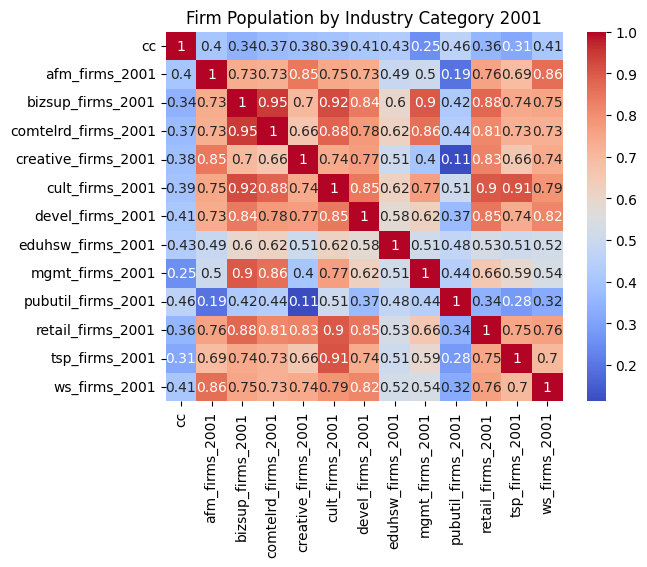

In [128]:
corr_2001 = data[['cc', 'afm_firms_2001', 'bizsup_firms_2001', 'comtelrd_firms_2001', 'creative_firms_2001', 'cult_firms_2001', 'devel_firms_2001', 'eduhsw_firms_2001', 'mgmt_firms_2001', 'pubutil_firms_2001', 'retail_firms_2001', 'tsp_firms_2001', 'ws_firms_2001']].corr(numeric_only = True)
sns.heatmap(corr_2001, annot=True, cmap="coolwarm")
plt.title("Firm Population by Industry Category 2001")

Text(0.5, 1.0, 'Firm Population by Industry Category 2011')

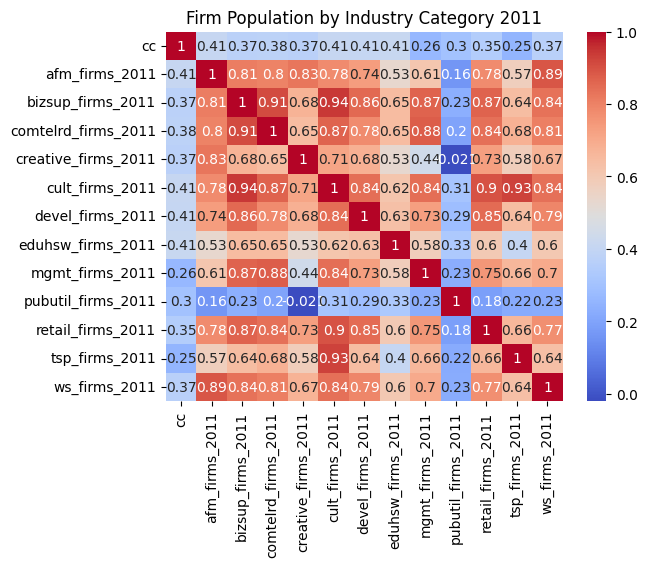

In [129]:
corr_2011 = data[['cc', 'afm_firms_2011', 'bizsup_firms_2011', 'comtelrd_firms_2011', 'creative_firms_2011', 'cult_firms_2011', 'devel_firms_2011', 'eduhsw_firms_2011', 'mgmt_firms_2011', 'pubutil_firms_2011', 'retail_firms_2011', 'tsp_firms_2011', 'ws_firms_2011']].corr(numeric_only = True)
sns.heatmap(corr_2011, annot=True, cmap="coolwarm")
plt.title("Firm Population by Industry Category 2011")

Text(0.5, 1.0, 'Firm Population Change by Industry Category')

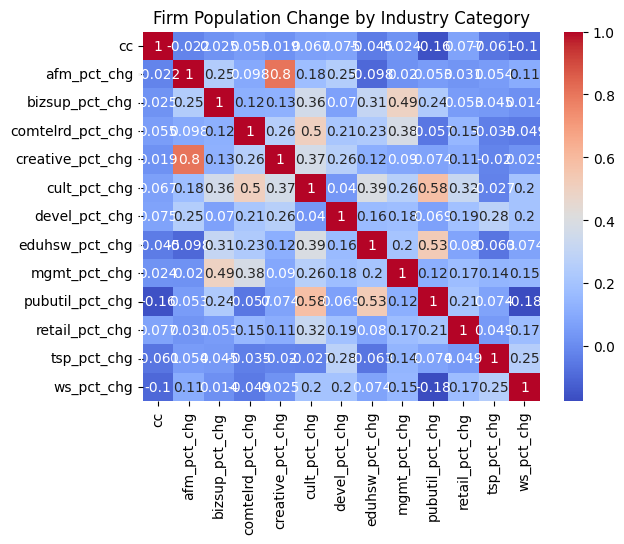

In [130]:
corr_pc = data[['cc', 'afm_pct_chg', 'bizsup_pct_chg', 'comtelrd_pct_chg', 'creative_pct_chg', 'cult_pct_chg', 'devel_pct_chg', 'eduhsw_pct_chg', 'mgmt_pct_chg', 'pubutil_pct_chg', 'retail_pct_chg', 'tsp_pct_chg', 'ws_pct_chg']].corr(numeric_only = True)
sns.heatmap(corr_pc, annot=True, cmap="coolwarm")
plt.title("Firm Population Change by Industry Category")

Text(0.5, 1.0, 'Firm Population 2001')

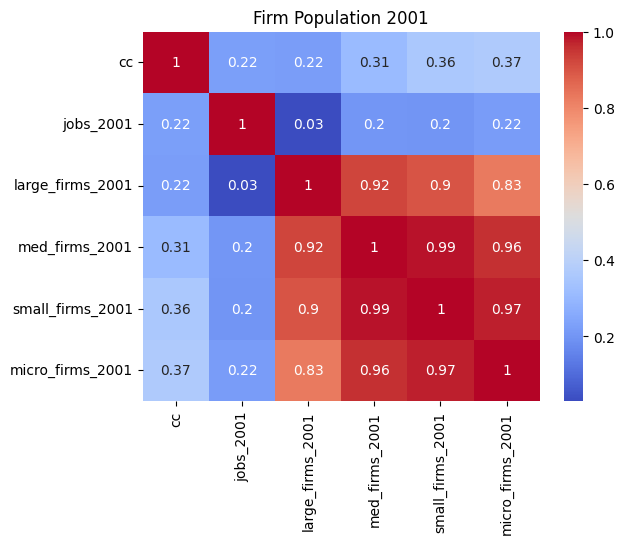

In [131]:
corr_2001 = data[['cc', 'jobs_2001', 'large_firms_2001', 'med_firms_2001', 'small_firms_2001', 'micro_firms_2001']].corr(numeric_only = True)
sns.heatmap(corr_2001, annot=True, cmap="coolwarm")
plt.title("Firm Population 2001")

Text(0.5, 1.0, 'Firm Population 2011')

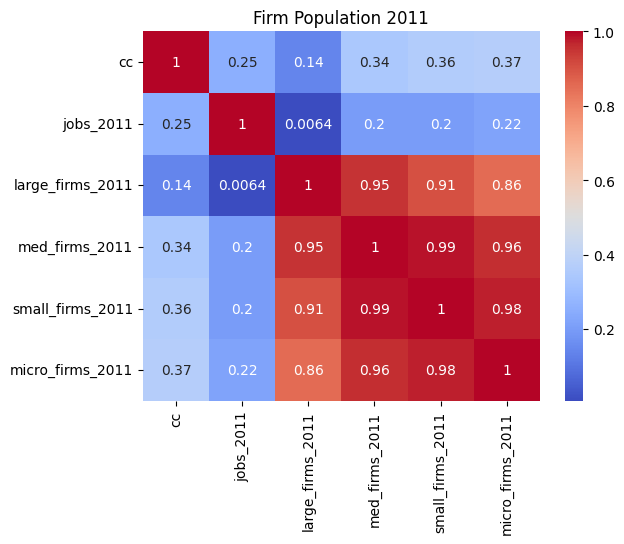

In [132]:
corr_2011 = data[['cc', 'jobs_2011', 'large_firms_2011', 'med_firms_2011', 'small_firms_2011', 'micro_firms_2011']].corr(numeric_only = True)
sns.heatmap(corr_2011, annot=True, cmap="coolwarm")
plt.title("Firm Population 2011")

Text(0.5, 1.0, 'Firm Population Change')

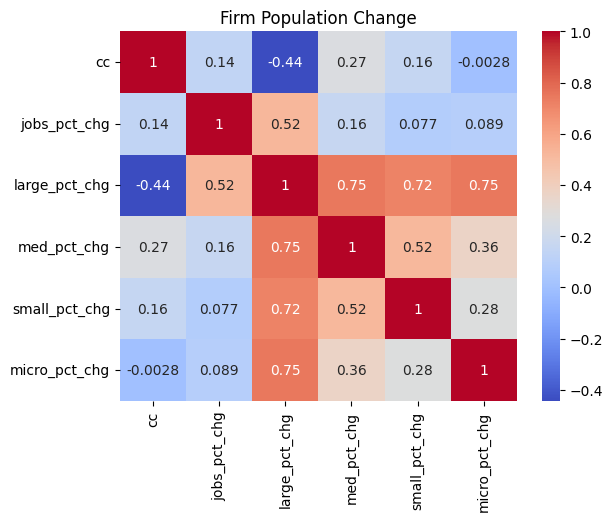

In [133]:
corr = data[['cc', 'jobs_pct_chg', 'large_pct_chg', 'med_pct_chg', 'small_pct_chg', 'micro_pct_chg']].corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Firm Population Change")

Text(0.5, 1.0, 'Jobs, Access and Rent Levels 2001')

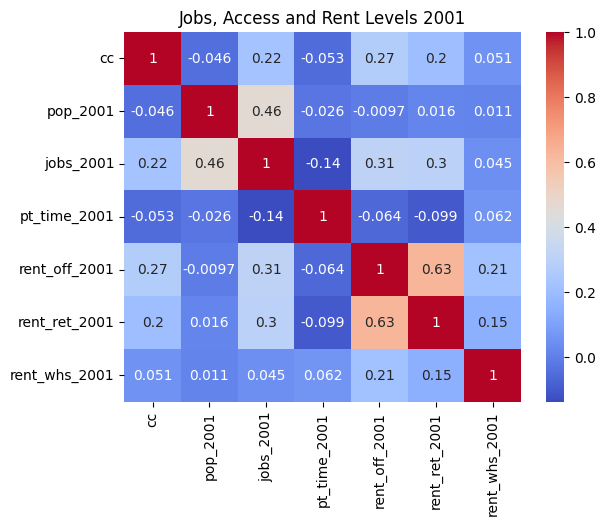

In [134]:
corr_2001 = data[['cc', 'pop_2001', 'jobs_2001', 'pt_time_2001', 'rent_off_2001', 'rent_ret_2001', 'rent_whs_2001']].corr(numeric_only = True)
sns.heatmap(corr_2001, annot=True, cmap="coolwarm")
plt.title("Jobs, Access and Rent Levels 2001")

Text(0.5, 1.0, 'Jobs, Access and Rent Levels 2011')

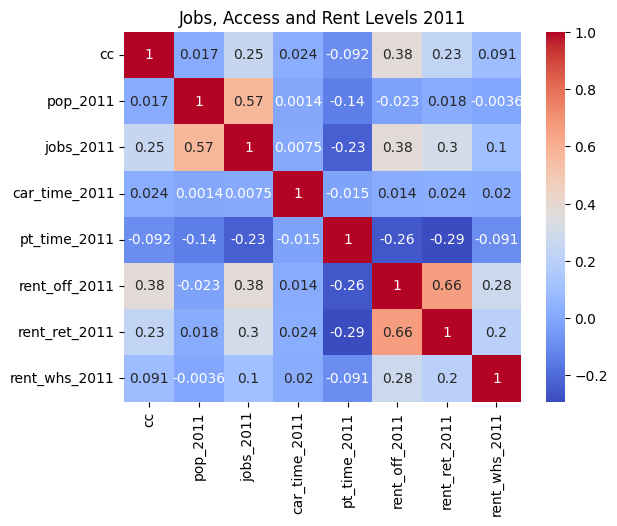

In [135]:
corr_2011 = data[['cc', 'pop_2011', 'jobs_2011', 'car_time_2011', 'pt_time_2011', 'rent_off_2011', 'rent_ret_2011', 'rent_whs_2011']].corr(numeric_only = True)
sns.heatmap(corr_2011, annot=True, cmap="coolwarm")
plt.title("Jobs, Access and Rent Levels 2011")

Text(0.5, 1.0, 'Jobs, Access and Rent Change')

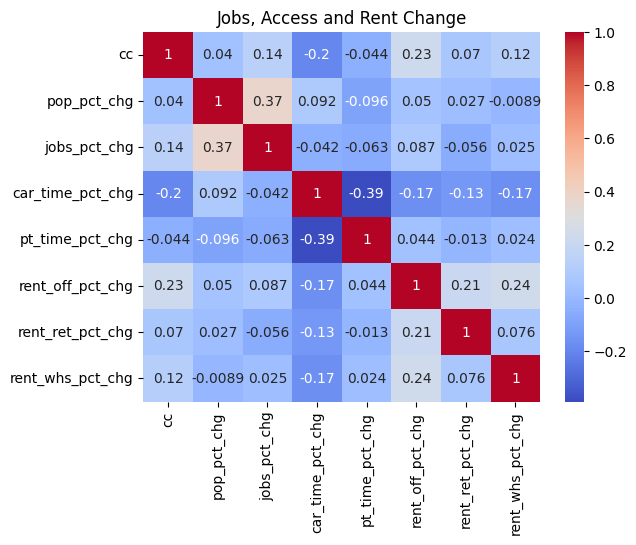

In [136]:
corr = data[['cc', 'pop_pct_chg', 'jobs_pct_chg', 'car_time_pct_chg', 'pt_time_pct_chg', 'rent_off_pct_chg', 'rent_ret_pct_chg', 'rent_whs_pct_chg']].corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Jobs, Access and Rent Change")

##**4. Feature Engineering**

Now we split up the dataset into target and predictive features, and separated for analysis by year: 2001, 2011 and percent change. First we replace all null values with zeroes, to avoid issues with modeling.




In [137]:
#Check for missing values
data.isnull().sum()

,0
lsoa01,0
lsoa01_name,0
lsoa_area,0
cc,0
afm_firms_2001,4167
...,...
med_firms_2011_log,4580
sm_firms_2001_log,3789
sm_firms_2011_log,3760
micro_firms_2001_log,184


In [138]:
#Replace all null values with zeroes
data.replace(np.nan, 0, inplace=True)
data.isna().sum()

,0
lsoa01,0
lsoa01_name,0
lsoa_area,0
cc,0
afm_firms_2001,0
...,...
med_firms_2011_log,0
sm_firms_2001_log,0
sm_firms_2011_log,0
micro_firms_2001_log,0


In [139]:
#Create the target dataset
#Save the y dataset
y = data['cc']
y.to_csv('/content/drive/MyDrive/MLAI_Haas/Capstone/y.csv', index=False)
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4765 entries, 0 to 4764
Series name: cc
Non-Null Count  Dtype
--------------  -----
4765 non-null   int64
dtypes: int64(1)
memory usage: 37.4 KB


In [140]:
#Drop non numeric features and features that will not be used as predictors
X=data.drop(columns=['lsoa01', 'lsoa01_name', 'lsoa_area', 'car_time_2001'])
X.shape

(4765, 79)

## 4.1 Normalize all the features

In [141]:
#Scale the predictors using StandardScalar
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the data
scaled_data = StandardScaler().fit_transform(X)

# create a new DataFrame with the scaled data
X = pd.DataFrame(scaled_data, columns=X.columns)

#Save scaled dataset
X.to_csv('/content/drive/MyDrive/MLAI_Haas/Capstone/X.csv')
X.head()

,cc,afm_firms_2001,afm_firms_2011,afm_pct_chg,bizsup_firms_2001,bizsup_firms_2011,bizsup_pct_chg,car_time_2011,car_time_pct_chg,comtelrd_firms_2001,...,out_below,out_above,lrg_firms_2001_log,lrg_firms_2011_log,med_firms_2001_log,med_firms_2011_log,sm_firms_2001_log,sm_firms_2011_log,micro_firms_2001_log,micro_firms_2011_log
0,-0.14,-0.22,-0.17,0.12,-0.12,-0.14,-0.05,-0.06,-0.06,-0.23,...,0.00,0.00,-0.07,-0.08,-0.19,-0.20,-0.49,-0.50,-0.81,-0.90
1,-0.14,-0.22,-0.17,0.12,-0.12,-0.14,-0.05,-0.06,-0.06,-0.23,...,0.00,0.00,-0.07,-0.08,-0.19,-0.20,-0.49,-0.50,-1.14,-3.98
2,-0.14,-0.22,-0.17,0.12,-0.12,-0.14,-0.05,-0.06,-0.06,-0.23,...,0.00,0.00,-0.07,-0.08,-0.19,-0.20,-0.49,-0.50,-0.28,0.20
3,-0.14,-0.22,-0.17,0.12,-0.12,-0.14,-0.05,-0.06,-0.06,-0.23,...,0.00,0.00,-0.07,-0.08,-0.19,-0.20,-0.49,-0.50,-0.57,-1.08
4,-0.14,-0.22,-0.17,0.12,-0.12,-0.14,-0.05,-0.06,-0.06,-0.23,...,0.00,0.00,-0.07,-0.08,-0.19,-0.20,-0.49,-0.50,-0.87,-0.53


## 4.2 Split into target and predictor datasets

In [142]:
#Split scaled X features into sets representing 2001, 2011, and percent change predictors
X01 = X.filter(regex='_2001')
X11 = X.filter(regex='_2011')
Xpc = X.filter(regex='_pct_chg')
X01.info()
#Save the 2001 Dataset
X01.to_csv('/content/drive/MyDrive/MLAI_Haas/Capstone/X01.csv', index=False)
#Save the 2011 Dataset
X11.to_csv('/content/drive/MyDrive/MLAI_Haas/Capstone/X11.csv', index=False)
#Save the Pct Chg Dataset
Xpc.to_csv('/content/drive/MyDrive/MLAI_Haas/Capstone/Xpc.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4765 entries, 0 to 4764
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   afm_firms_2001        4765 non-null   float64
 1   bizsup_firms_2001     4765 non-null   float64
 2   comtelrd_firms_2001   4765 non-null   float64
 3   creative_firms_2001   4765 non-null   float64
 4   cult_firms_2001       4765 non-null   float64
 5   devel_firms_2001      4765 non-null   float64
 6   eduhsw_firms_2001     4765 non-null   float64
 7   jobs_2001             4765 non-null   float64
 8   large_firms_2001      4765 non-null   float64
 9   med_firms_2001        4765 non-null   float64
 10  mgmt_firms_2001       4765 non-null   float64
 11  micro_firms_2001      4765 non-null   float64
 12  pop_2001              4765 non-null   float64
 13  pt_time_2001          4765 non-null   float64
 14  pubutil_firms_2001    4765 non-null   float64
 15  rent_off_2001        

##**5. Summary of Observations**

The final cleaned dataset has 149,861 vehicle listings. Now we will look at the descriptive statistics, with visualizations, and make some observations.

##Summary of Observations
All or nearly all listings included these attributes: Price, Year, Manufacturer, Model, Fuel, Odometer, Transmission.
